In [1]:
# from optimal_transport import compute_optimal_transport, OptimalTransport

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
# import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import pairwise_distances

%matplotlib inline

import ot
import ot.plot

def ricker_func(t, t0, sigma):
    t = t-t0
    f = (1 - np.power(t,2) / (sigma**2)) * np.exp(-1 * np.power(t,2)/(2*sigma**2))
    return f

def compute_optimal_transport(M, r, c, lam, epsilon=1e-5):
    """
    Computes the optimal transport matrix and Slinkhorn distance using the
    Sinkhorn-Knopp algorithm

    Inputs:
        - M : cost matrix (n x m)
        - r : vector of marginals (n, )
        - c : vector of marginals (m, )
        - lam : strength of the entropic regularization
        - epsilon : convergence parameter

    Output:
        - P : optimal transport matrix (n x m)
        - dist : Sinkhorn distance
    """
    n, m = M.shape
    P = np.exp(- lam * M)
    P /= P.sum()
    u = np.zeros(n)
    # normalize this matrix
    while np.max(np.abs(u - P.sum(1))) > epsilon:
        u = P.sum(1)
        P *= (r / u).reshape((-1, 1))
        P *= (c / P.sum(0)).reshape((1, -1))
    return P, np.sum(P * M)

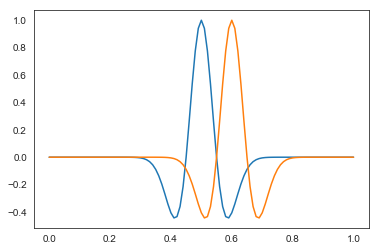

In [2]:
Nt = 101
dt = 0.01
t = np.linspace(0,1,Nt)

# f = np.sin(2*np.pi*2*t)
# g = np.sin(2*np.pi*2*(t-0.1))
# g = np.sin(2*np.pi*2.5*t) * 2 + np.cos(2*np.pi*1.2)

f = ricker_func(t, 0.5, 0.05)
g = ricker_func(t, 0.6, 0.05)

ff = np.ones(Nt) / Nt
gg = np.ones(Nt) / Nt
plt.figure(1)
plt.plot(t,f,t,g)

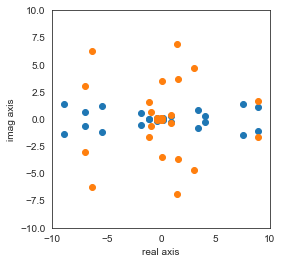

In [3]:
f_hat = np.fft.fft(f)
g_hat = np.fft.fft(g)

f_hata = f_hat / np.abs(f_hat)
g_hata = g_hat / np.abs(g_hat)

f_w = np.zeros([Nt,2])
f_w[:,0] = np.real(f_hat)
f_w[:,1] = np.imag(f_hat)

g_w = np.zeros([Nt,2])
g_w[:,0] = np.real(g_hat)
g_w[:,1] = np.imag(g_hat)

f_wa = np.zeros([Nt,2])
f_wa[:,0] = np.real(f_hata)
f_wa[:,1] = np.imag(f_hata)

g_wa = np.zeros([Nt,2])
g_wa[:,0] = np.real(g_hata)
g_wa[:,1] = np.imag(g_hata)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(np.real(f_hat), np.imag(f_hat))
ax.scatter(np.real(g_hat), np.imag(g_hat))
ax.set_xlim([-10, 10])
ax.set_ylim([-10, 10])
ax.set_xlabel('real axis')
ax.set_ylabel('imag axis')
ax.set_aspect('equal')

## Cost matrix in Fourier domain

In this section, we show different cost matrices

### L2 difference

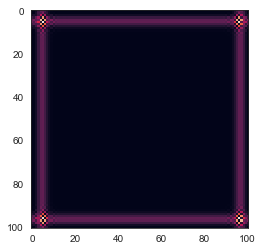

In [4]:
# cost matrix: l2

M_l2 = np.zeros([Nt,Nt])
for i in range(0,Nt):
    for j in range(0,Nt):
        M_l2[i,j] = np.abs(f_hat[i] - g_hat[j])**2
        
plt.imshow(M_l2)

### Phase difference

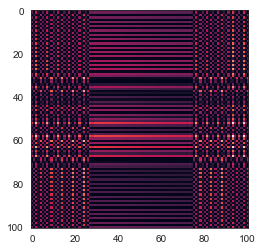

In [5]:
# cost matrix: angle
f_ang = np.arctan2(np.real(f_hat), np.imag(f_hat)) + np.pi;
g_ang = np.arctan2(np.real(g_hat), np.imag(g_hat)) + np.pi;

M_ang = np.zeros([Nt,Nt])
for i in range(0,Nt):
    for j in range(0,Nt):
        M_ang[i,j] = np.abs(f_ang[i] - g_ang[j])**2
        
plt.imshow(M_ang)

### Energy difference

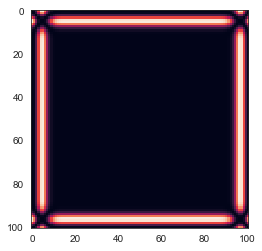

In [6]:
# cost matrix: energy
f_e = np.abs(f_hat);
g_e = np.abs(g_hat);

M_e = np.zeros([Nt,Nt])
for i in range(0,Nt):
    for j in range(0,Nt):
        M_e[i,j] = np.abs(f_e[i] - g_e[j])**2

plt.imshow(M_e)

### Phase + energy difference

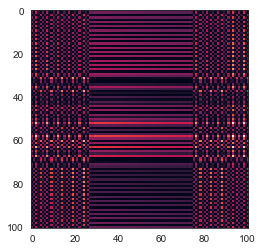

In [7]:
k = 0.01
M = M_ang + k * M_e

plt.imshow(M)

## Transportation

In this section, we change different cost matrix $M$ to test different cases.

### L2 difference

2.4699690727589996

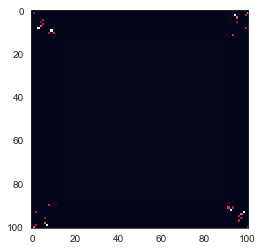

In [8]:
lamb = 10

P, d = compute_optimal_transport(M_l2, ff, gg, lamb);

plt.imshow(P)
d

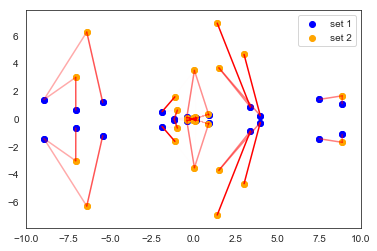

In [9]:
fig, ax = plt.subplots()
ax.scatter(f_w[:,0], f_w[:,1], color='blue')
ax.scatter(g_w[:,0], g_w[:,1], color='orange')
ax.scatter(f_w[:,0], f_w[:,1], color='blue', label='set 1')
ax.scatter(g_w[:,0], g_w[:,1], color='orange', label='set 2')

ax.legend(loc=0)

for i in range(Nt):
    for j in range(Nt):
        if P[i,j] > 1e-5:
            ax.plot([f_w[i,0], g_w[j,0]], [f_w[i,1], g_w[j,1]], alpha=P[i,j] * Nt, color='red')

### Phase difference

0.07629381446585895

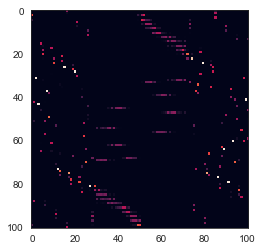

In [10]:
lamb = 1000

P, d = compute_optimal_transport(M_ang, ff, gg, lamb);

plt.imshow(P)
d

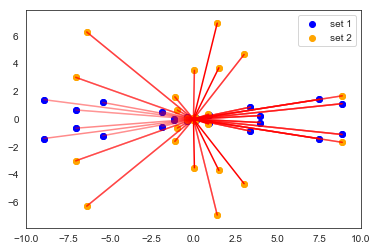

In [11]:
fig, ax = plt.subplots()
ax.scatter(f_w[:,0], f_w[:,1], color='blue')
ax.scatter(g_w[:,0], g_w[:,1], color='orange')
ax.scatter(f_w[:,0], f_w[:,1], color='blue', label='set 1')
ax.scatter(g_w[:,0], g_w[:,1], color='orange', label='set 2')

ax.legend(loc=0)

for i in range(Nt):
    for j in range(Nt):
        if P[i,j] > 1e-5:
            ax.plot([f_w[i,0], g_w[j,0]], [f_w[i,1], g_w[j,1]], alpha=P[i,j] * Nt, color='red')

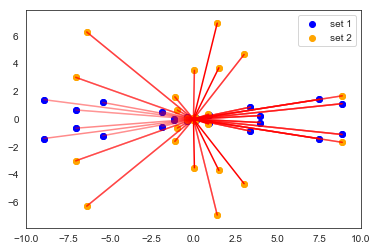

In [12]:
fig, ax = plt.subplots()
ax.scatter(f_w[:,0], f_w[:,1], color='blue')
ax.scatter(g_w[:,0], g_w[:,1], color='orange')
ax.scatter(f_w[:,0], f_w[:,1], color='blue', label='set 1')
ax.scatter(g_w[:,0], g_w[:,1], color='orange', label='set 2')

ax.legend(loc=0)

for i in range(Nt):
    for j in range(Nt):
        if P[i,j] > 1e-5:
            ax.plot([f_w[i,0], g_w[j,0]], [f_w[i,1], g_w[j,1]], alpha=P[i,j] * Nt, color='red')

### Energy difference

4.023446288032169e-05

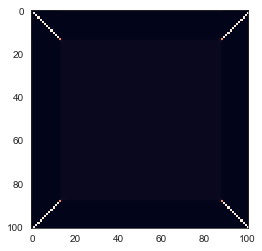

In [13]:
lamb = 1000

P, d = compute_optimal_transport(M_e, ff, gg, lamb);

plt.imshow(P)
d

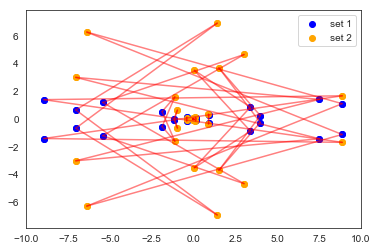

In [14]:
fig, ax = plt.subplots()
ax.scatter(f_w[:,0], f_w[:,1], color='blue')
ax.scatter(g_w[:,0], g_w[:,1], color='orange')
ax.scatter(f_w[:,0], f_w[:,1], color='blue', label='set 1')
ax.scatter(g_w[:,0], g_w[:,1], color='orange', label='set 2')

ax.legend(loc=0)

for i in range(Nt):
    for j in range(Nt):
        if P[i,j] > 1e-5:
            ax.plot([f_w[i,0], g_w[j,0]], [f_w[i,1], g_w[j,1]], alpha=P[i,j] * Nt, color='red')

### Phase + energy difference

1.3198854285845867

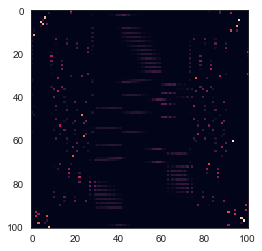

In [15]:
lamb = 100

k = 0.05
M = M_ang + k * M_e
P, d = compute_optimal_transport(M, ff, gg, lamb);

plt.imshow(P)
d

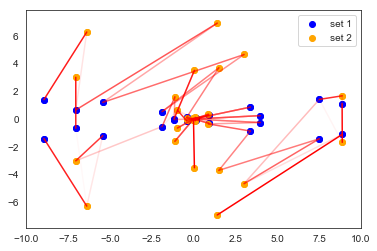

In [16]:
fig, ax = plt.subplots()
ax.scatter(f_w[:,0], f_w[:,1], color='blue')
ax.scatter(g_w[:,0], g_w[:,1], color='orange')
ax.scatter(f_w[:,0], f_w[:,1], color='blue', label='set 1')
ax.scatter(g_w[:,0], g_w[:,1], color='orange', label='set 2')

ax.legend(loc=0)

for i in range(Nt):
    for j in range(Nt):
        if P[i,j] > 1e-5:
            ax.plot([f_w[i,0], g_w[j,0]], [f_w[i,1], g_w[j,1]], alpha=P[i,j] * Nt, color='red')